# Time Series Generation via a GRU Teacher Forcing

## MinMax Normalization Technique

In [1]:
import numpy as np
import pandas as pd

def MinMaxScaler(data):
  """Min Max normalizer.
  
  Args:
    - data: original data
  
  Returns:
    - norm_data: normalized data
  """
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  norm_data = numerator / (denominator + 1e-7)
  return norm_data

## Reading and Parsing the Data

In [2]:
# Reading and parsing the data from a text file
parsed_data = []
with open('ECG5000_data.txt', 'r') as file:
    for line in file:
        # Splitting each line by space and filtering out empty strings
        parsed_line = [float(x) for x in line.strip().split() if x]
        parsed_data.append(parsed_line)

# Converting the list of lists into a DataFrame
df = pd.DataFrame(parsed_data)

# Dropping the first column (Label)
df = df.drop(df.columns[0], axis=1)

# Convert the DataFrame into a 3D NumPy array with the shape (4500, 140, 1)
np_array_3d = df.values.reshape((4500, 140, 1))

# Reshaping and transposing for normalization
data_reshaped = np_array_3d.reshape(np_array_3d.shape[0], np_array_3d.shape[1])
data_transposed = data_reshaped.T

# Normalizing the transposed data
scaled_data_transposed = MinMaxScaler(data_transposed)

# Reversing transformations and reshaping back to 3D for further analysis
data = scaled_data_transposed.T.reshape(np_array_3d.shape[0], np_array_3d.shape[1], 1)

## Training

In [1]:
# Setting up network parameters
parameters = dict()

parameters['iterations'] = 3000
parameters['batch_size'] = 128
parameters['num_layer'] = 4
parameters['module'] = 'gru'

# Printing the parameters to confirm
print(parameters)

{'iterations': 3000, 'batch_size': 128, 'num_layer': 4, 'module': 'gru'}


In [4]:
# Training a teacher-forcing model with GRU units
from rnn_tf import rnn_tforcing
generated_data = rnn_tforcing(np.array(data), parameters)

Iteration 0, Training Loss: 0.08424072340130806
Iteration 1000, Training Loss: 0.03182072751224041
Iteration 2000, Training Loss: 0.004103414074052125
Iteration 2999, Training Loss: 0.003672847233247012


/Users/samskanderi/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


## Visualization

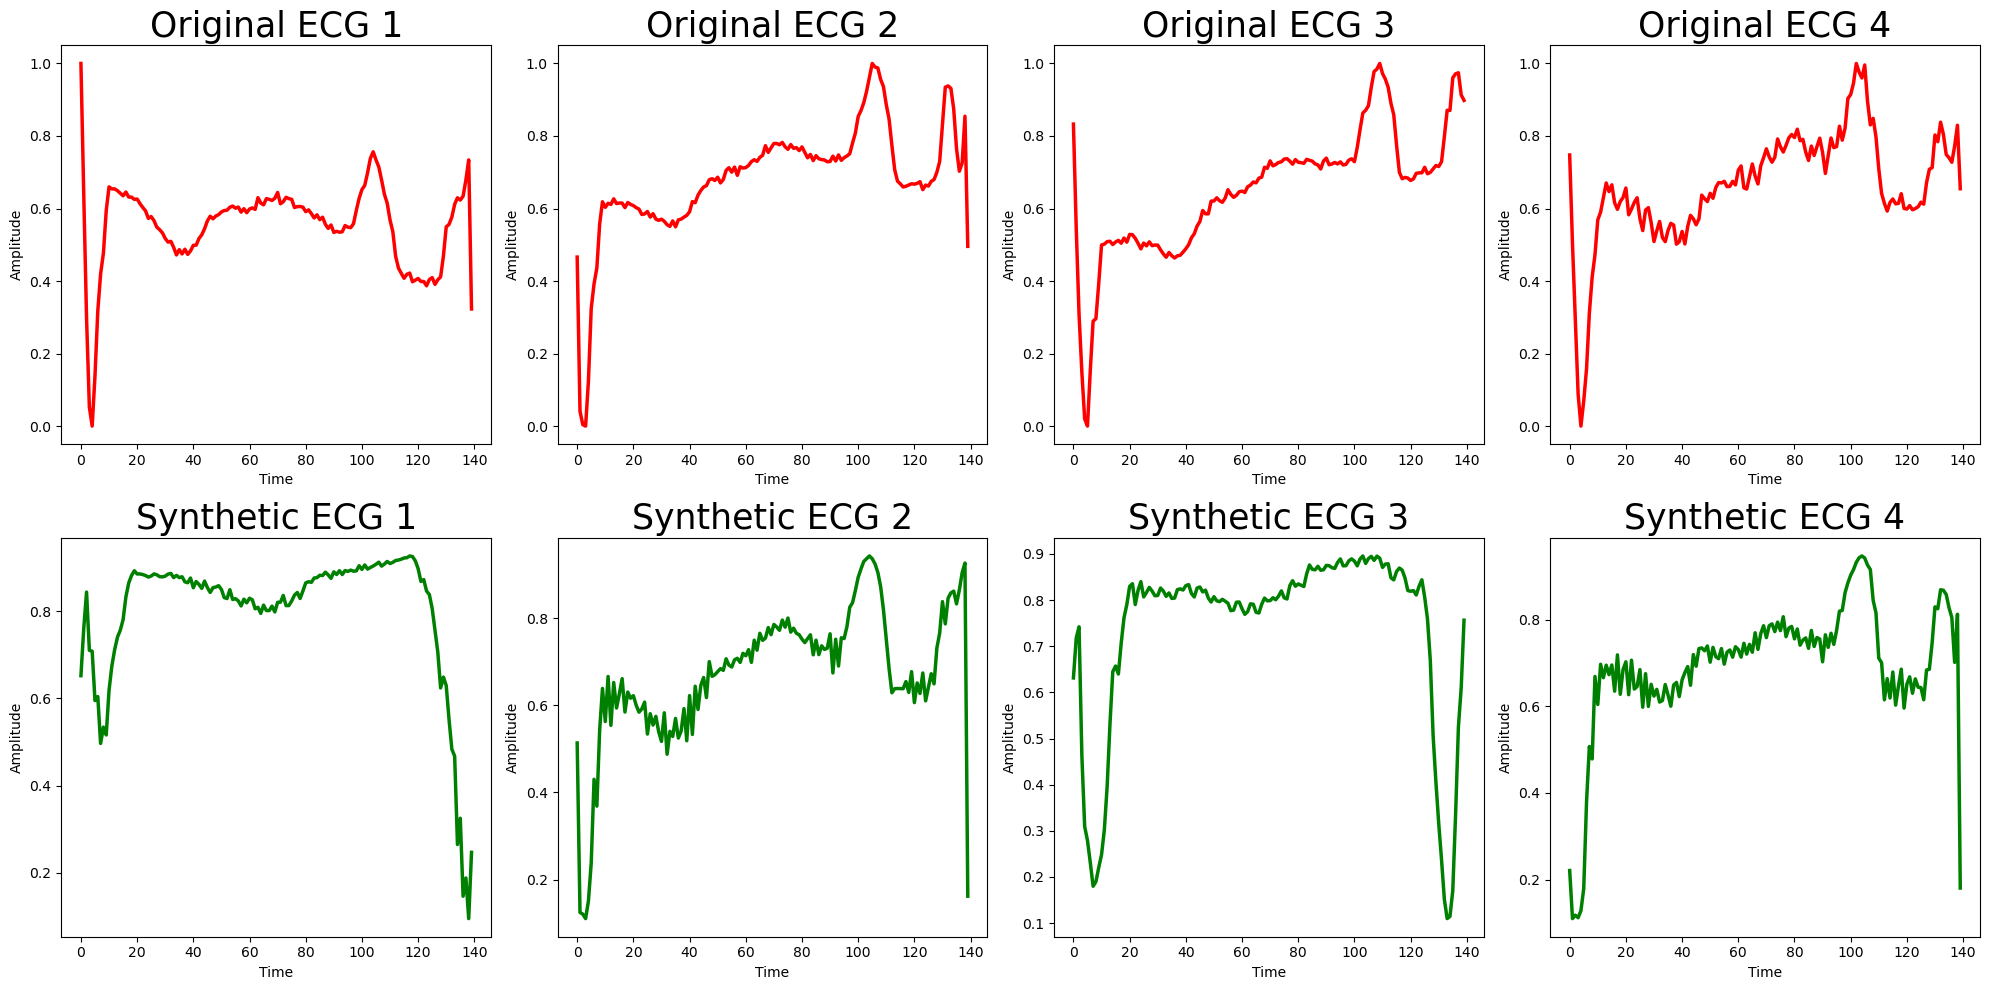

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming original_data[1] and generated_data[1] are available as NumPy arrays
# with shapes like (num_samples, num_timestamps, num_features)

# Selecting 4 samples from both datasets
original_samples_ecg = np.array(data)[0:4, :, 0]  # First feature, 4 samples
generated_samples_ecg = np.array(generated_data)[0:4, :, 0]  # First feature, 4 samples

# Setting up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns

# Plotting the original samples
    
for i in range(4):
    sns.lineplot(x=np.arange(original_samples_ecg.shape[1]), y=original_samples_ecg[i], ax=axes[0, i], color='red',linewidth=2.5)
    axes[0, i].set_title(f'Original ECG {i+1}', fontsize=25)
    axes[0, i].set_xlabel('Time')
    axes[0, i].set_ylabel('Amplitude')

# Plotting the generated samples
for i in range(4):
    sns.lineplot(x=np.arange(generated_samples_ecg.shape[1]), y=generated_samples_ecg[i], ax=axes[1, i], color='green',linewidth=2.5)
    axes[1, i].set_title(f'Synthetic ECG {i+1}', fontsize=25)
    axes[1, i].set_xlabel('Time')
    axes[1, i].set_ylabel('Amplitude')

plt.tight_layout()
plt.savefig('examples.pdf')
plt.show()
